In [ ]:
# RandomForestQuiz - 2020-04-24 - Hunter Darling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_train = pd.read_csv('Quiz5_data/property_sales_train.csv')
df_test = pd.read_csv('Quiz5_data/property_sales_test.csv')

In [3]:
df_train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,GRANT CITY,13 CONDOS - ELEVATOR APARTMENTS,2,3585,1055,,R4,100 COLFAX AVENUE,1J,...,1,0,1,-,-,1961,2,R4,235000,2016-12-21 00:00:00
1,1,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,,D3,30 WEST 141ST STREET,,...,771,0,771,189025,555954,1959,2,D3,5020000,2016-11-07 00:00:00
2,4,SOUTH OZONE PARK,02 TWO FAMILY DWELLINGS,1,11666,47,,B3,115-39 122ND STREET,,...,2,0,2,2800,1224,1940,1,B3,475000,2017-03-23 00:00:00
3,1,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1370,38,,D4,"418 EAST 59TH STREET, 35A",,...,0,0,0,-,-,1988,2,D4,1760000,2017-08-21 00:00:00
4,3,BRIGHTON BEACH,10 COOPS - ELEVATOR APARTMENTS,2,8721,375,,D4,"1311 BRIGHTWATER AVENUE, 8B",,...,0,0,0,0,0,1959,2,D4,425000,2017-06-30 00:00:00


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46891 entries, 0 to 46890
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         46891 non-null  int64 
 1   NEIGHBORHOOD                    46891 non-null  object
 2   BUILDING CLASS CATEGORY         46891 non-null  object
 3   TAX CLASS AT PRESENT            46891 non-null  object
 4   BLOCK                           46891 non-null  int64 
 5   LOT                             46891 non-null  int64 
 6   EASE-MENT                       46891 non-null  object
 7   BUILDING CLASS AT PRESENT       46891 non-null  object
 8   ADDRESS                         46891 non-null  object
 9   APARTMENT NUMBER                46891 non-null  object
 10  ZIP CODE                        46891 non-null  int64 
 11  RESIDENTIAL UNITS               46891 non-null  int64 
 12  COMMERCIAL UNITS                46891 non-null

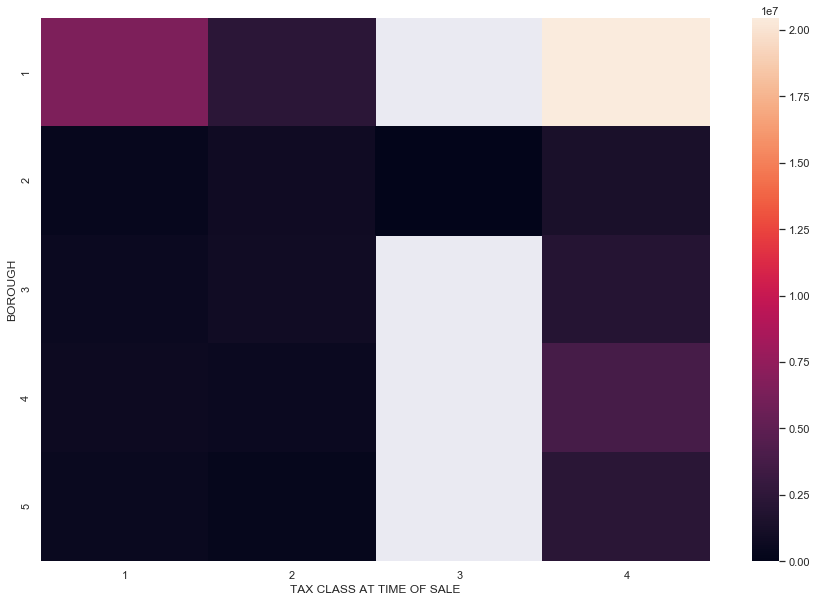

In [5]:
plt.figure(figsize=(15,10))
sns.set()
houses = df_train.pivot_table("SALE PRICE", 
                       "BOROUGH", 
                       "TAX CLASS AT TIME OF SALE")
hm = sns.heatmap(houses)

In [6]:
np.count_nonzero(df_train["TOTAL UNITS"].unique())

144

In [7]:
drops = ['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT',
         'ADDRESS','APARTMENT NUMBER','RESIDENTIAL UNITS','COMMERCIAL UNITS','LAND SQUARE FEET',
         'GROSS SQUARE FEET','BUILDING CLASS AT TIME OF SALE','SALE DATE']

In [8]:
df_train1 = df_train.drop(drops, axis=1)
df_test1 = df_test.drop(drops, axis=1)

In [9]:
df_train1[:3]

,BOROUGH,BLOCK,LOT,ZIP CODE,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,5,3585,1055,10306,1,1961,2,235000
1,1,1737,25,10037,771,1959,2,5020000
2,4,11666,47,11420,2,1940,1,475000


In [10]:
df_test1[:3]

,BOROUGH,BLOCK,LOT,ZIP CODE,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
0,3,5143,38,11218,1,1920,1
1,3,36,1231,11201,1,1899,2
2,3,6197,26,11204,2,1925,1


In [11]:
X_train = df_train1.drop(['SALE PRICE'], axis=1).values
y_train = df_train1['SALE PRICE'].values
X_test = df_test1

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

In [28]:
my_n_estimators = [100, 200, 300]
my_oob_scores = []
from sklearn.ensemble import RandomForestRegressor
for estimator in my_n_estimators:
    myRF = RandomForestRegressor(n_estimators=estimator, 
                                 max_features=None,  
                                 random_state=123, 
                                 oob_score=True,
                                 n_jobs=1)
    myRF.fit(X_train_norm, y_train)
    my_oob_scores.append([estimator, myRF.oob_score_])

In [29]:
my_oob_scores

[[100, 0.09731789500250176],
 [200, 0.16168500031750332],
 [300, 0.16729456071504845]]

In [30]:
n_estimators_best = 300
my_max_features = [i for i in range(1,X_train_norm.shape[1])] 
my_oob_scores = []
for max_features in my_max_features:
    myRF = RandomForestRegressor(n_estimators=n_estimators_best,
                                 max_features=max_features,  
                                 random_state=123, 
                                 oob_score=True)
    myRF.fit(X_train_norm, y_train)
    my_oob_scores.append([max_features, myRF.oob_score_])

In [31]:
my_oob_scores

[[1, 0.2848464252298665],
 [2, 0.313666662015446],
 [3, 0.293062742458017],
 [4, 0.23206649493066434],
 [5, 0.24072628066521695],
 [6, 0.21055043065674517]]

In [33]:
max_features_best = 2
myRF = RandomForestRegressor(n_estimators=n_estimators_best,
                              max_features=max_features_best,  
                              random_state=123, oob_score=True)

In [34]:
myRF.fit(X_train_norm, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=True,
                      random_state=123, verbose=0, warm_start=False)

In [35]:
y_pred = myRF.predict(X_test_norm)